In [1]:
import pandas as pd
import pandas_datareader.data as reader
import datetime as dt
import numpy
import scipy.stats

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv("stock_data.csv")  # load stock data

In [4]:
df

,PERMNO,date,SHRCD,EXCHCD,CUSIP,FACPR,FACSHR,PRC,RET,SHROUT
0,10026,31JAN2018,11,3,46603210,NaN,NaN,138.44000,-0.088191,18678
1,10026,28FEB2018,11,3,46603210,NaN,NaN,134.33000,-0.029688,18678
2,10026,29MAR2018,11,3,46603210,0.0,0.0,136.56000,0.019951,18697
3,10026,30APR2018,11,3,46603210,NaN,NaN,137.41000,0.006224,18702
4,10026,31MAY2018,11,3,46603210,NaN,NaN,141.62000,0.030638,18702
...,...,...,...,...,...,...,...,...,...,...
111913,93436,29MAY2020,11,3,88160R10,NaN,NaN,835.00000,0.067939,185371
111914,93436,30JUN2020,11,3,88160R10,NaN,NaN,1079.81006,0.293186,186000
111915,93436,31JUL2020,11,3,88160R10,NaN,NaN,1430.76001,0.325011,186362
111916,93436,31AUG2020,11,3,88160R10,4.0,4.0,498.32001,0.741452,931809


In [5]:
df.info() #screen the data and check the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111918 entries, 0 to 111917
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PERMNO  111918 non-null  int64  
 1   date    111918 non-null  object 
 2   SHRCD   111918 non-null  int64  
 3   EXCHCD  111918 non-null  int64  
 4   CUSIP   111918 non-null  object 
 5   FACPR   15409 non-null   float64
 6   FACSHR  15409 non-null   float64
 7   PRC     111918 non-null  float64
 8   RET     111918 non-null  object 
 9   SHROUT  111918 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 8.5+ MB


In [6]:
# We see above that RET is not numerical.

print(df.RET.describe()) # check the values of RET

count     111918
unique     88123
top            C
freq         570
Name: RET, dtype: object


In [7]:
print(df.RET.value_counts())  # check the values of RET

C            570
0.000000     500
-0.090909     47
-0.100000     44
-0.111111     41
            ... 
0.195164       1
-0.054664      1
0.067329       1
0.020998       1
-0.032778      1
Name: RET, Length: 88123, dtype: int64


In [8]:
df = df[df.RET!="C"] # remove observations with invalid data

In [9]:
df.RET = df.RET.astype("float") # change type to float for calculations

In [10]:
df.date = pd.to_datetime(df.date) # convert type of object to datetime

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111348 entries, 0 to 111917
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   PERMNO  111348 non-null  int64         
 1   date    111348 non-null  datetime64[ns]
 2   SHRCD   111348 non-null  int64         
 3   EXCHCD  111348 non-null  int64         
 4   CUSIP   111348 non-null  object        
 5   FACPR   15400 non-null   float64       
 6   FACSHR  15400 non-null   float64       
 7   PRC     111348 non-null  float64       
 8   RET     111348 non-null  float64       
 9   SHROUT  111348 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 9.3+ MB


In [12]:
df.PERMNO.nunique()

4156

In [13]:
df.CUSIP.nunique()

4156

In [14]:
df = df.drop(["SHRCD", "EXCHCD", "CUSIP", "FACPR", "FACSHR"], axis=1) #exclude unnecessary columns

In [15]:
df

,PERMNO,date,PRC,RET,SHROUT
0,10026,2018-01-31,138.44000,-0.088191,18678
1,10026,2018-02-28,134.33000,-0.029688,18678
2,10026,2018-03-29,136.56000,0.019951,18697
3,10026,2018-04-30,137.41000,0.006224,18702
4,10026,2018-05-31,141.62000,0.030638,18702
...,...,...,...,...,...
111913,93436,2020-05-29,835.00000,0.067939,185371
111914,93436,2020-06-30,1079.81006,0.293186,186000
111915,93436,2020-07-31,1430.76001,0.325011,186362
111916,93436,2020-08-31,498.32001,0.741452,931809


In [16]:
# remove duplicates

df.drop_duplicates(subset=["PERMNO", "date"], inplace=True)

In [17]:
df # 50 observations are removed

,PERMNO,date,PRC,RET,SHROUT
0,10026,2018-01-31,138.44000,-0.088191,18678
1,10026,2018-02-28,134.33000,-0.029688,18678
2,10026,2018-03-29,136.56000,0.019951,18697
3,10026,2018-04-30,137.41000,0.006224,18702
4,10026,2018-05-31,141.62000,0.030638,18702
...,...,...,...,...,...
111913,93436,2020-05-29,835.00000,0.067939,185371
111914,93436,2020-06-30,1079.81006,0.293186,186000
111915,93436,2020-07-31,1430.76001,0.325011,186362
111916,93436,2020-08-31,498.32001,0.741452,931809


In [18]:
#lagged price and lagged share numbers to calculate lagged market cap

df["PRC_shifted"] = df.PRC.shift(1)

df["SHROUT_shifted"] = df.SHROUT.shift(1)

In [19]:
df

,PERMNO,date,PRC,RET,SHROUT,PRC_shifted,SHROUT_shifted
0,10026,2018-01-31,138.44000,-0.088191,18678,NaN,NaN
1,10026,2018-02-28,134.33000,-0.029688,18678,138.44000,18678.0
2,10026,2018-03-29,136.56000,0.019951,18697,134.33000,18678.0
3,10026,2018-04-30,137.41000,0.006224,18702,136.56000,18697.0
4,10026,2018-05-31,141.62000,0.030638,18702,137.41000,18702.0
...,...,...,...,...,...,...,...
111913,93436,2020-05-29,835.00000,0.067939,185371,781.88000,185371.0
111914,93436,2020-06-30,1079.81006,0.293186,186000,835.00000,185371.0
111915,93436,2020-07-31,1430.76001,0.325011,186362,1079.81006,186000.0
111916,93436,2020-08-31,498.32001,0.741452,931809,1430.76001,186362.0


In [20]:
# find first occurrence of assets to remove those observations

indexes=[]

for i in df.PERMNO.unique():
    indexes.append(df.loc[df.PERMNO==i, "date"].idxmin())

In [21]:
# indexes to drop
indexes

[0,
 33,
 49,
 82,
 116,
 140,
 173,
 206,
 239,
 273,
 306,
 332,
 361,
 394,
 427,
 460,
 493,
 526,
 545,
 577,
 600,
 607,
 618,
 645,
 678,
 711,
 744,
 777,
 810,
 829,
 862,
 878,
 911,
 944,
 977,
 1003,
 1036,
 1055,
 1088,
 1121,
 1154,
 1187,
 1220,
 1253,
 1286,
 1319,
 1352,
 1364,
 1395,
 1428,
 1461,
 1494,
 1526,
 1556,
 1589,
 1598,
 1631,
 1664,
 1697,
 1717,
 1750,
 1783,
 1816,
 1849,
 1856,
 1889,
 1922,
 1955,
 1988,
 2021,
 2054,
 2087,
 2120,
 2153,
 2186,
 2220,
 2231,
 2264,
 2296,
 2329,
 2362,
 2395,
 2428,
 2456,
 2489,
 2522,
 2524,
 2549,
 2569,
 2602,
 2635,
 2668,
 2699,
 2732,
 2765,
 2798,
 2830,
 2863,
 2896,
 2918,
 2951,
 2984,
 3017,
 3049,
 3082,
 3115,
 3148,
 3181,
 3199,
 3232,
 3265,
 3298,
 3331,
 3364,
 3397,
 3420,
 3453,
 3468,
 3501,
 3534,
 3567,
 3600,
 3633,
 3666,
 3699,
 3732,
 3765,
 3798,
 3831,
 3864,
 3897,
 3924,
 3957,
 3990,
 4023,
 4056,
 4070,
 4103,
 4136,
 4169,
 4202,
 4235,
 4268,
 4301,
 4333,
 4366,
 4399,
 4406,
 443

In [22]:
df.drop(indexes, inplace=True) # remove first occurrences of assets

In [23]:
df

,PERMNO,date,PRC,RET,SHROUT,PRC_shifted,SHROUT_shifted
1,10026,2018-02-28,134.33000,-0.029688,18678,138.44000,18678.0
2,10026,2018-03-29,136.56000,0.019951,18697,134.33000,18678.0
3,10026,2018-04-30,137.41000,0.006224,18702,136.56000,18697.0
4,10026,2018-05-31,141.62000,0.030638,18702,137.41000,18702.0
5,10026,2018-06-29,152.47000,0.079791,18697,141.62000,18702.0
...,...,...,...,...,...,...,...
111913,93436,2020-05-29,835.00000,0.067939,185371,781.88000,185371.0
111914,93436,2020-06-30,1079.81006,0.293186,186000,835.00000,185371.0
111915,93436,2020-07-31,1430.76001,0.325011,186362,1079.81006,186000.0
111916,93436,2020-08-31,498.32001,0.741452,931809,1430.76001,186362.0


In [24]:
df["MarketCap"] = df.PRC_shifted * df.SHROUT_shifted  # add market capitalization column for lagged market caps

In [25]:
df

,PERMNO,date,PRC,RET,SHROUT,PRC_shifted,SHROUT_shifted,MarketCap
1,10026,2018-02-28,134.33000,-0.029688,18678,138.44000,18678.0,2.585782e+06
2,10026,2018-03-29,136.56000,0.019951,18697,134.33000,18678.0,2.509016e+06
3,10026,2018-04-30,137.41000,0.006224,18702,136.56000,18697.0,2.553262e+06
4,10026,2018-05-31,141.62000,0.030638,18702,137.41000,18702.0,2.569842e+06
5,10026,2018-06-29,152.47000,0.079791,18697,141.62000,18702.0,2.648577e+06
...,...,...,...,...,...,...,...,...
111913,93436,2020-05-29,835.00000,0.067939,185371,781.88000,185371.0,1.449379e+08
111914,93436,2020-06-30,1079.81006,0.293186,186000,835.00000,185371.0,1.547848e+08
111915,93436,2020-07-31,1430.76001,0.325011,186362,1079.81006,186000.0,2.008447e+08
111916,93436,2020-08-31,498.32001,0.741452,931809,1430.76001,186362.0,2.666393e+08


In [26]:
end = dt.date(2020,9,30)
start = dt.date(2018,1,31)

In [27]:
#Load size cut offs

ME = reader.DataReader("ME_Breakpoints", "famafrench", start, end)

ME = ME[0]

ME.drop("Count", axis = 1, inplace=True)

ME.head()

,"(0, 5)","(5, 10)","(10, 15)","(15, 20)","(20, 25)","(25, 30)","(30, 35)","(35, 40)","(40, 45)","(45, 50)","(50, 55)","(55, 60)","(60, 65)","(65, 70)","(70, 75)","(75, 80)","(80, 85)","(85, 90)","(90, 95)","(95, 100)"
Date,,,,,,,,,,,,,,,,,,,,
2018-01,215.56,372.09,586.14,824.17,1112.33,1410.39,1726.87,2142.10,2724.66,3219.96,3920.99,4931.82,6211.34,7918.76,10767.24,14342.77,20937.08,32758.79,61052.78,530427.75
2018-02,202.21,348.91,546.56,782.58,1036.52,1336.11,1628.55,2048.34,2523.20,3064.73,3761.39,4610.53,5953.82,7800.27,10333.79,13780.42,19740.89,30791.97,58685.26,510922.84
2018-03,209.23,355.17,576.52,808.47,1068.03,1322.96,1666.96,2050.33,2592.44,3110.75,3746.97,4731.39,6050.83,7782.17,10269.01,14074.02,19634.67,31130.96,57694.64,492021.41
2018-04,210.79,370.43,590.37,848.46,1101.87,1339.80,1683.28,2102.13,2642.88,3158.28,3768.83,4639.83,5968.81,7995.97,10254.13,14031.08,19943.94,31420.25,58573.70,477967.25
2018-05,229.90,395.89,619.95,871.19,1131.38,1453.44,1766.43,2163.04,2719.25,3244.11,3937.87,4879.56,6149.16,8047.04,10248.78,14403.69,19776.45,32014.21,59209.29,472639.75


In [28]:
label= ["P"+str(i) for i in range(1,21)]   #portfolio names

for i in df.date.unique():  #loop over months
    
    bins = ME.loc[i]        #take cut off values from ME
    
    bins = [i*1000 for i in bins]   #multiply ME cut-off values with 1000 to match the market cap scale in stock data
    
    bins.insert(0,0)        #insert 0 as beginning cut off value
    
    df.loc[df.date==i, "Portfolio"] =  pd.cut(df.loc[df.date==i, "MarketCap"], bins=bins, labels=label)
    #group data frame with size cut-off values and assign a portfolio category to each asset

In [29]:
df

,PERMNO,date,PRC,RET,SHROUT,PRC_shifted,SHROUT_shifted,MarketCap,Portfolio
1,10026,2018-02-28,134.33000,-0.029688,18678,138.44000,18678.0,2.585782e+06,P10
2,10026,2018-03-29,136.56000,0.019951,18697,134.33000,18678.0,2.509016e+06,P9
3,10026,2018-04-30,137.41000,0.006224,18702,136.56000,18697.0,2.553262e+06,P9
4,10026,2018-05-31,141.62000,0.030638,18702,137.41000,18702.0,2.569842e+06,P9
5,10026,2018-06-29,152.47000,0.079791,18697,141.62000,18702.0,2.648577e+06,P9
...,...,...,...,...,...,...,...,...,...
111913,93436,2020-05-29,835.00000,0.067939,185371,781.88000,185371.0,1.449379e+08,P20
111914,93436,2020-06-30,1079.81006,0.293186,186000,835.00000,185371.0,1.547848e+08,P20
111915,93436,2020-07-31,1430.76001,0.325011,186362,1079.81006,186000.0,2.008447e+08,P20
111916,93436,2020-08-31,498.32001,0.741452,931809,1430.76001,186362.0,2.666393e+08,P20


In [30]:
#check if all assets are within the size boundaries

df.isnull().sum()

PERMNO              0
date                0
PRC                 0
RET                 0
SHROUT              0
PRC_shifted         0
SHROUT_shifted      0
MarketCap           0
Portfolio         106
dtype: int64

In [31]:
df.loc[df.Portfolio.isnull(), "Portfolio"] = "P20"  #place 106 XL stocks/rows in Portfolio 20

In [32]:
df.isnull().sum() # all stocks are categorized

PERMNO            0
date              0
PRC               0
RET               0
SHROUT            0
PRC_shifted       0
SHROUT_shifted    0
MarketCap         0
Portfolio         0
dtype: int64

In [33]:
#save portfolio total caps of monthly re-balanced portfolios to use when calculating weights
p_caps = df.groupby(["date", "Portfolio"])["MarketCap"].sum().reset_index().rename(columns={"MarketCap":"PortfolioCap"})


#add portfolio caps to the same data frame
df_merged = pd.merge(df, p_caps, how="left", on=["date", "Portfolio"])


#calculate weighted return of each asset
df_merged["W_Return"] = df_merged.RET * df_merged.MarketCap / df_merged.PortfolioCap


#aggregate weighted returns to calculate total portfolio return
df_1 = df_merged.groupby(["date", "Portfolio"])["W_Return"].sum().reset_index().rename(columns={"W_Return":"P_Return"})


#percentage
df_1["P_Return"] = df_1["P_Return"]*100


#add portfolio categories to the same dataframe
df_2= pd.merge(df_merged, df_1, on=["date", "Portfolio"])

#create a new data frame with monthly portfolio returns
portfolio_matrix = pd.pivot_table(data=df_2, values="P_Return", index="date", columns="Portfolio")

portfolio_matrix = portfolio_matrix.reindex(columns=label)

portfolio_matrix

Portfolio,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20
date,,,,,,,,,,,,,,,,,,,,
2018-02-28,-3.297776,-5.346319,-2.488856,-3.731055,-2.552384,-4.136283,-2.436128,-4.109997,-4.691023,-4.105119,-3.955891,-2.563380,-4.547128,-3.562001,-4.259939,-3.665857,-3.865264,-3.626529,-2.937636,-3.548800
2018-03-29,3.349731,1.894182,2.772062,1.005590,0.468396,1.932296,0.108049,0.843248,0.827041,-0.136029,0.826757,0.101833,0.612102,-0.258417,-0.537327,-0.177112,0.796589,-1.710660,-1.193704,-3.705860
2018-04-30,1.511450,1.906268,2.600144,1.126992,1.018604,1.867747,-0.093459,2.327007,0.875845,-0.578755,0.113775,1.106647,-0.391760,-0.846942,1.086490,0.031170,-0.326251,0.402202,1.483246,0.271504
2018-05-31,6.120625,6.558095,7.435360,8.726057,5.225437,6.894334,8.718932,2.426866,5.894826,4.807169,5.123900,5.309244,4.065798,1.363334,3.133244,2.347862,1.529051,0.232426,2.293879,2.822475
2018-06-29,1.690625,1.490643,2.157156,1.845825,2.075723,2.265754,1.860088,0.905154,0.990732,0.484988,2.081314,-0.165805,-0.339708,0.923194,0.845422,1.291717,0.675840,1.084934,0.758835,0.385196
2018-07-31,-0.789982,-0.347864,-0.703236,0.298340,2.225258,1.719989,2.816342,1.980429,1.784299,1.241965,2.652597,1.489719,1.549141,2.302809,2.859196,2.365211,3.348636,3.584556,2.373225,4.115799
2018-08-31,3.415440,3.421608,4.534349,3.731668,6.487561,5.565667,3.664840,4.941800,0.484484,5.080476,3.825836,5.446518,3.024392,3.587660,3.589962,3.407254,3.041501,2.430002,1.883090,4.104851
2018-09-28,-0.196543,-1.990895,-3.644523,-3.483692,-3.253124,-1.537946,-3.200131,-1.253754,-2.308609,-2.083187,-2.165606,-1.336078,-0.985963,-0.605935,-0.407443,-0.299044,-0.509394,0.256069,0.453323,0.784663
2018-10-31,-9.931233,-10.597969,-11.090405,-10.618111,-12.689879,-11.973080,-12.429768,-10.689001,-12.360602,-10.506576,-9.060233,-10.071611,-9.754491,-10.253368,-9.680050,-8.693001,-8.876348,-6.706524,-7.873463,-6.487363


In [34]:
portfolio_matrix.describe() #summary

Portfolio,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,1.947372,0.374691,0.787010,0.392304,0.078347,0.431533,0.229419,0.353235,0.265814,0.118859,0.572105,0.494813,0.337543,0.487874,0.572321,0.645936,0.716418,0.808470,0.616336,1.089045
std,8.962859,7.845285,8.224126,7.672493,8.232000,8.073860,8.423883,7.414847,7.698419,7.598442,7.494213,7.219220,7.169786,7.316812,7.279336,6.464101,6.084389,5.633579,5.633778,5.321018
min,-21.847808,-24.015554,-21.059775,-21.595197,-23.647619,-25.305350,-27.539049,-21.129268,-22.697237,-22.915915,-21.631787,-21.606858,-23.143601,-22.066634,-23.383727,-18.913627,-17.196536,-13.904848,-17.002988,-9.598571
25%,-2.268089,-3.220745,-3.792593,-3.744686,-3.855346,-3.527703,-3.249811,-3.461317,-2.582954,-3.418355,-2.718610,-2.807663,-1.388686,-1.133712,-1.522456,-0.464429,-0.848247,-1.377244,-1.296461,-2.011875
50%,1.674445,0.637350,1.889834,1.066291,1.070499,1.854865,1.723722,1.932553,1.387515,0.960088,1.723816,1.412423,1.261512,1.071871,1.729231,1.992229,1.266307,0.974611,1.868299,1.985267
75%,5.115705,5.877049,5.690994,5.017134,4.763120,5.651689,4.585720,4.051426,4.381023,4.156353,4.284828,5.054460,4.128233,4.097296,3.827401,3.553203,3.596777,3.615047,3.039895,4.107588
max,26.647699,19.020796,20.559396,16.932853,21.078166,16.904054,18.645124,18.274472,17.941813,17.277624,18.312491,14.363780,15.566676,16.332385,15.991535,15.030285,13.193827,14.120327,11.966298,13.148588


In [35]:
# load Fama French data to get rf rate

FF = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start, end)
FF = FF[0]
FF.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
2018-01,5.58,-3.09,-1.32,0.11
2018-02,-3.65,0.30,-1.01,0.11
2018-03,-2.35,4.05,-0.12,0.12
2018-04,0.29,1.13,0.50,0.14
2018-05,2.65,5.28,-3.15,0.14


In [36]:
FF = FF[1:] # remove the first row
FF.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
2018-02,-3.65,0.30,-1.01,0.11
2018-03,-2.35,4.05,-0.12,0.12
2018-04,0.29,1.13,0.50,0.14
2018-05,2.65,5.28,-3.15,0.14
2018-06,0.48,1.19,-2.31,0.14


In [37]:
md = pd.read_csv("market_return.csv") # load market return data
md.head()

,DATE,vwretd,totval
0,20180131,0.050626,3.760267e+10
1,20180228,-0.039510,3.601644e+10
2,20180329,-0.018454,3.524306e+10
3,20180430,0.004710,3.537297e+10
4,20180531,0.026175,3.626635e+10


In [38]:
md.drop(0, inplace=True) # remove the first row

In [39]:
md.head()

,DATE,vwretd,totval
1,20180228,-0.039510,3.601644e+10
2,20180329,-0.018454,3.524306e+10
3,20180430,0.004710,3.537297e+10
4,20180531,0.026175,3.626635e+10
5,20180629,0.005364,3.629198e+10


In [40]:
portfolio_matrix.index= md.index  #set indexes of data frames equal
df_port = portfolio_matrix.join(md) # join portfolio return matrix and market returns
df_port.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P14,P15,P16,P17,P18,P19,P20,DATE,vwretd,totval
1,-3.297776,-5.346319,-2.488856,-3.731055,-2.552384,-4.136283,-2.436128,-4.109997,-4.691023,-4.105119,...,-3.562001,-4.259939,-3.665857,-3.865264,-3.626529,-2.937636,-3.548800,20180228,-0.039510,3.601644e+10
2,3.349731,1.894182,2.772062,1.005590,0.468396,1.932296,0.108049,0.843248,0.827041,-0.136029,...,-0.258417,-0.537327,-0.177112,0.796589,-1.710660,-1.193704,-3.705860,20180329,-0.018454,3.524306e+10
3,1.511450,1.906268,2.600144,1.126992,1.018604,1.867747,-0.093459,2.327007,0.875845,-0.578755,...,-0.846942,1.086490,0.031170,-0.326251,0.402202,1.483246,0.271504,20180430,0.004710,3.537297e+10
4,6.120625,6.558095,7.435360,8.726057,5.225437,6.894334,8.718932,2.426866,5.894826,4.807169,...,1.363334,3.133244,2.347862,1.529051,0.232426,2.293879,2.822475,20180531,0.026175,3.626635e+10
5,1.690625,1.490643,2.157156,1.845825,2.075723,2.265754,1.860088,0.905154,0.990732,0.484988,...,0.923194,0.845422,1.291717,0.675840,1.084934,0.758835,0.385196,20180629,0.005364,3.629198e+10


In [41]:
df_port.index = FF.index  #set indexes equal
df_port.totval = FF.RF    #replace totval column with RF rates from fama french data
df_port = df_port.rename(columns={'totval': 'RF'}) # rename the column as RF
df_port.vwretd = df_port.vwretd*100 # multiply market return with 100 as other returns are in percentage
df_port

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P14,P15,P16,P17,P18,P19,P20,DATE,vwretd,RF
Date,,,,,,,,,,,,,,,,,,,,,
2018-02,-3.297776,-5.346319,-2.488856,-3.731055,-2.552384,-4.136283,-2.436128,-4.109997,-4.691023,-4.105119,...,-3.562001,-4.259939,-3.665857,-3.865264,-3.626529,-2.937636,-3.548800,20180228,-3.9510,0.11
2018-03,3.349731,1.894182,2.772062,1.005590,0.468396,1.932296,0.108049,0.843248,0.827041,-0.136029,...,-0.258417,-0.537327,-0.177112,0.796589,-1.710660,-1.193704,-3.705860,20180329,-1.8454,0.12
2018-04,1.511450,1.906268,2.600144,1.126992,1.018604,1.867747,-0.093459,2.327007,0.875845,-0.578755,...,-0.846942,1.086490,0.031170,-0.326251,0.402202,1.483246,0.271504,20180430,0.4710,0.14
2018-05,6.120625,6.558095,7.435360,8.726057,5.225437,6.894334,8.718932,2.426866,5.894826,4.807169,...,1.363334,3.133244,2.347862,1.529051,0.232426,2.293879,2.822475,20180531,2.6175,0.14
2018-06,1.690625,1.490643,2.157156,1.845825,2.075723,2.265754,1.860088,0.905154,0.990732,0.484988,...,0.923194,0.845422,1.291717,0.675840,1.084934,0.758835,0.385196,20180629,0.5364,0.14
2018-07,-0.789982,-0.347864,-0.703236,0.298340,2.225258,1.719989,2.816342,1.980429,1.784299,1.241965,...,2.302809,2.859196,2.365211,3.348636,3.584556,2.373225,4.115799,20180731,3.1604,0.16
2018-08,3.415440,3.421608,4.534349,3.731668,6.487561,5.565667,3.664840,4.941800,0.484484,5.080476,...,3.587660,3.589962,3.407254,3.041501,2.430002,1.883090,4.104851,20180831,3.0205,0.16
2018-09,-0.196543,-1.990895,-3.644523,-3.483692,-3.253124,-1.537946,-3.200131,-1.253754,-2.308609,-2.083187,...,-0.605935,-0.407443,-0.299044,-0.509394,0.256069,0.453323,0.784663,20180928,0.0432,0.15
2018-10,-9.931233,-10.597969,-11.090405,-10.618111,-12.689879,-11.973080,-12.429768,-10.689001,-12.360602,-10.506576,...,-10.253368,-9.680050,-8.693001,-8.876348,-6.706524,-7.873463,-6.487363,20181031,-7.4075,0.19


In [42]:
df_famamacbeth = df_port.copy(deep=True) # take a copy of returns to use in Fama Macbeth test in task 2

In [43]:
# subtract risk free rate from each portfolio return and obtain portfolio excess returns

for p in label:
    df_port[p] = df_port[p] - df_port['RF']
    
df_port.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P14,P15,P16,P17,P18,P19,P20,DATE,vwretd,RF
Date,,,,,,,,,,,,,,,,,,,,,
2018-02,-3.407776,-5.456319,-2.598856,-3.841055,-2.662384,-4.246283,-2.546128,-4.219997,-4.801023,-4.215119,...,-3.672001,-4.369939,-3.775857,-3.975264,-3.736529,-3.047636,-3.658800,20180228,-3.9510,0.11
2018-03,3.229731,1.774182,2.652062,0.885590,0.348396,1.812296,-0.011951,0.723248,0.707041,-0.256029,...,-0.378417,-0.657327,-0.297112,0.676589,-1.830660,-1.313704,-3.825860,20180329,-1.8454,0.12
2018-04,1.371450,1.766268,2.460144,0.986992,0.878604,1.727747,-0.233459,2.187007,0.735845,-0.718755,...,-0.986942,0.946490,-0.108830,-0.466251,0.262202,1.343246,0.131504,20180430,0.4710,0.14
2018-05,5.980625,6.418095,7.295360,8.586057,5.085437,6.754334,8.578932,2.286866,5.754826,4.667169,...,1.223334,2.993244,2.207862,1.389051,0.092426,2.153879,2.682475,20180531,2.6175,0.14
2018-06,1.550625,1.350643,2.017156,1.705825,1.935723,2.125754,1.720088,0.765154,0.850732,0.344988,...,0.783194,0.705422,1.151717,0.535840,0.944934,0.618835,0.245196,20180629,0.5364,0.14


In [44]:
#market excess return

df_port["MktRF"] = df_port["vwretd"] - df_port["RF"]

In [45]:
df_port
df = df_port.drop(["DATE"], axis = 1)

In [46]:
df.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P14,P15,P16,P17,P18,P19,P20,vwretd,RF,MktRF
Date,,,,,,,,,,,,,,,,,,,,,
2018-02,-3.407776,-5.456319,-2.598856,-3.841055,-2.662384,-4.246283,-2.546128,-4.219997,-4.801023,-4.215119,...,-3.672001,-4.369939,-3.775857,-3.975264,-3.736529,-3.047636,-3.658800,-3.9510,0.11,-4.0610
2018-03,3.229731,1.774182,2.652062,0.885590,0.348396,1.812296,-0.011951,0.723248,0.707041,-0.256029,...,-0.378417,-0.657327,-0.297112,0.676589,-1.830660,-1.313704,-3.825860,-1.8454,0.12,-1.9654
2018-04,1.371450,1.766268,2.460144,0.986992,0.878604,1.727747,-0.233459,2.187007,0.735845,-0.718755,...,-0.986942,0.946490,-0.108830,-0.466251,0.262202,1.343246,0.131504,0.4710,0.14,0.3310
2018-05,5.980625,6.418095,7.295360,8.586057,5.085437,6.754334,8.578932,2.286866,5.754826,4.667169,...,1.223334,2.993244,2.207862,1.389051,0.092426,2.153879,2.682475,2.6175,0.14,2.4775
2018-06,1.550625,1.350643,2.017156,1.705825,1.935723,2.125754,1.720088,0.765154,0.850732,0.344988,...,0.783194,0.705422,1.151717,0.535840,0.944934,0.618835,0.245196,0.5364,0.14,0.3964


In [47]:
df.to_excel("port.xlsx")

In [48]:
df.to_csv('port.csv')

In [49]:
#running time-series regressions to estimate portfolio betas, alphas, t stats and R2s

import statsmodels.formula.api as sm

alphas = []
betas = []
t_alpha = []
t_beta = []
r_squared = []

for p in label:
    formula = p + " ~ MktRF"
    model = sm.ols(formula, data=df).fit()
    alphas.append(model.params[0])
    betas.append(model.params[1])
    t_alpha.append(model.tvalues[0])
    t_beta.append(model.tvalues[1])
    r_squared.append(model.rsquared)
      

In [50]:
stats = { "𝛼": alphas,"t-stats for 𝛼" : t_alpha, "𝛽" : betas, "t-stats for 𝛽": t_beta, "R2": r_squared}

stats = pd.DataFrame(stats, index = label)

stats

,𝛼,t-stats for 𝛼,𝛽,t-stats for 𝛽,R2
P1,0.925915,1.244208,1.446004,10.642465,0.790594
P2,-0.559820,-0.986296,1.304676,12.589589,0.840847
P3,-0.180726,-0.294533,1.358683,12.127759,0.830587
P4,-0.535278,-1.047054,1.293411,13.857239,0.864879
P5,-0.914191,-1.763601,1.398998,14.781908,0.879278
P6,-0.551113,-1.151494,1.382919,15.825873,0.893032
P7,-0.798826,-1.754300,1.457038,17.525593,0.911018
P8,-0.580810,-1.790526,1.303917,22.016428,0.941716
P9,-0.695959,-1.953884,1.348989,20.743103,0.934822
P10,-0.833175,-2.409324,1.333159,21.115007,0.936954


In [51]:
# manually checked if beta matches the P1 beta above, it does.

numpy.cov(df["P1"], df["MktRF"])/numpy.var(df["MktRF"], ddof = 1)

array([[2.64475841, 1.44600446],
       [1.44600446, 1.        ]])

In [52]:
print(stats[stats["t-stats for 𝛼"] > 1.96].index.tolist()) # portfolios with significant alphas 
                                                            # larger than positive critical t value

print(stats[stats["t-stats for 𝛼"] < -1.96].index.tolist()) # portfolios with significant betas
                                                            # smaller than negative critical t value


#total significant

count_significant = stats[stats["t-stats for 𝛼"] > 1.96].shape[0] + stats[stats["t-stats for 𝛼"] < -1.96].shape[0]

print(count_significant)

[]
['P10']
1


In [53]:
stats.to_excel('stats.xlsx')

In [54]:
import matplotlib.pyplot as plt

-0.5553419438294354
1.1337070912365086


Text(0, 0.5, 'Excess Return')

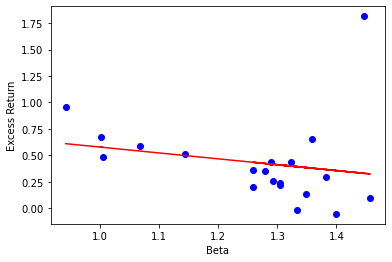

In [55]:
#select excess returns and take their mean along axis 0

means = df[label].mean(axis=0)

m, b = numpy.polyfit(betas, means, 1)

print(m)
print(b)

plt.plot(betas, means, 'bo')
plt.plot(betas, m*numpy.array(betas) + b, '-r')
plt.xlabel("Beta")
plt.ylabel("Excess Return")

# R code for GRS statistics

port <- read.csv("port.csv") #please copy this to get the saved file, the file is saved with a command above

excess_returns <- port[1:32,2:21]

excess_mkt_returns <- port[1:32,24]

install.packages("GRS.test")
library(GRS.test)

GRS.test(excess_returns,excess_mkt_returns)

### $GRS.stat = 1.524746

### GRS.pval = 0.238339


### Coefficients, t-stats and R2s match the table above

## 2. Fama - Macbeth Test

In [56]:
df_merged #from previous portfolio construction

,PERMNO,date,PRC,RET,SHROUT,PRC_shifted,SHROUT_shifted,MarketCap,Portfolio,PortfolioCap,W_Return
0,10026,2018-02-28,134.33000,-0.029688,18678,138.44000,18678.0,2.585782e+06,P10,3.688442e+08,-0.000208
1,10026,2018-03-29,136.56000,0.019951,18697,134.33000,18678.0,2.509016e+06,P9,3.380306e+08,0.000148
2,10026,2018-04-30,137.41000,0.006224,18702,136.56000,18697.0,2.553262e+06,P9,3.126647e+08,0.000051
3,10026,2018-05-31,141.62000,0.030638,18702,137.41000,18702.0,2.569842e+06,P9,3.517049e+08,0.000224
4,10026,2018-06-29,152.47000,0.079791,18697,141.62000,18702.0,2.648577e+06,P9,3.091373e+08,0.000684
...,...,...,...,...,...,...,...,...,...,...,...
107137,93436,2020-05-29,835.00000,0.067939,185371,781.88000,185371.0,1.449379e+08,P20,1.659035e+10,0.000594
107138,93436,2020-06-30,1079.81006,0.293186,186000,835.00000,185371.0,1.547848e+08,P20,1.811596e+10,0.002505
107139,93436,2020-07-31,1430.76001,0.325011,186362,1079.81006,186000.0,2.008447e+08,P20,1.804375e+10,0.003618
107140,93436,2020-08-31,498.32001,0.741452,931809,1430.76001,186362.0,2.666393e+08,P20,1.918095e+10,0.010307


In [57]:
# get the mean lagged size of stocks by portfolio by month

df_j = df_merged.groupby(["date", "Portfolio"])["MarketCap"].mean().reset_index().rename(columns={"MarketCap":"MarketCap_Mean"})

In [58]:
df_j = df_j.sort_values(by=["date", "MarketCap_Mean"])

df_j["MarketCap_Mean"] = df_j["MarketCap_Mean"]/1000 # unit will be in millions

df_j['Log Size'] = numpy.log(df_j['MarketCap_Mean']) # take logarithm

df_j

,date,Portfolio,MarketCap_Mean,Log Size
0,2018-02-28,P1,85.414405,4.447515
11,2018-02-28,P2,268.163406,5.591597
13,2018-02-28,P3,440.161160,6.087141
14,2018-02-28,P4,661.063053,6.493849
15,2018-02-28,P5,902.034546,6.804653
...,...,...,...,...
627,2020-09-30,P16,13087.802124,9.479436
628,2020-09-30,P17,18160.130747,9.806984
629,2020-09-30,P18,26671.771702,10.191361
630,2020-09-30,P19,47569.239946,10.769942


In [59]:
sizes = df_j["Log Size"]
sizes = numpy.array(sizes)
sizes = sizes.reshape(20,32)

size = ["Size"+str(i) for i in range(1,33)]

size_data = pd.DataFrame(sizes, columns = size)

size_data

,Size1,Size2,Size3,Size4,Size5,Size6,Size7,Size8,Size9,Size10,...,Size23,Size24,Size25,Size26,Size27,Size28,Size29,Size30,Size31,Size32
0,4.447515,5.591597,6.087141,6.493849,6.804653,7.067288,7.301004,7.516248,7.736650,7.927781,...,6.131074,6.532134,6.839885,7.083849,7.306867,7.519015,7.754158,7.947920,8.136493,8.350535
1,8.576702,8.822903,9.094123,9.407365,9.708840,10.114222,10.650973,11.993909,4.483173,5.645372,...,9.096730,9.387376,9.719834,10.113939,10.657130,11.988374,4.559225,5.729870,6.225759,6.605901
2,6.903300,7.160746,7.386611,7.580592,7.807703,7.989689,8.181752,8.384664,8.605381,8.845538,...,7.396662,7.592678,7.805259,8.005565,8.192947,8.383457,8.593383,8.830950,9.131859,9.401690
3,9.724634,10.088792,10.625713,11.961358,4.563997,5.739045,6.201694,6.591522,6.910221,7.197164,...,10.693157,12.013357,4.554996,5.751715,6.225222,6.627969,6.958151,7.209130,7.431020,7.624319
4,7.837350,8.044343,8.241367,8.433076,8.655615,8.869497,9.147829,9.439677,9.754271,10.143159,...,8.211698,8.414022,8.631101,8.886584,9.166508,9.450612,9.740764,10.130169,10.670904,12.059700
5,4.460609,5.599580,6.037988,6.426858,6.775611,7.056499,7.273232,7.468566,7.678151,7.897909,...,6.008535,6.431650,6.768449,7.036200,7.256741,7.478614,7.690821,7.892368,8.091185,8.304744
6,8.516359,8.761897,9.061377,9.366437,9.653146,10.075318,10.627955,11.987595,4.140369,5.328909,...,8.913970,9.243180,9.540789,9.949634,10.511924,11.910505,4.266347,5.458624,5.939692,6.387420
7,6.742540,7.018003,7.219294,7.422368,7.661224,7.892365,8.085875,8.308516,8.501175,8.732432,...,7.272223,7.476987,7.684785,7.918425,8.126462,8.331272,8.558451,8.798711,9.086479,9.378584
8,9.678620,10.098581,10.629440,11.975218,4.386545,5.506190,5.960963,6.393593,6.724260,6.999952,...,10.640917,11.991625,4.354150,5.500686,5.996461,6.409761,6.750195,7.037258,7.308220,7.514033
9,7.723198,7.935677,8.171542,8.406037,8.597502,8.861866,9.136184,9.430625,9.755439,10.177905,...,8.060409,8.306545,8.506333,8.763025,9.073543,9.363562,9.691531,10.121904,10.665688,12.072976


In [60]:
df_famamacbeth = df_famamacbeth.iloc[:,:20]
df_famamacbeth = df_famamacbeth.divide(100) # convert percentage back to proportion
df_famamacbeth

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20
Date,,,,,,,,,,,,,,,,,,,,
2018-02,-0.032978,-0.053463,-0.024889,-0.037311,-0.025524,-0.041363,-0.024361,-0.041100,-0.046910,-0.041051,-0.039559,-0.025634,-0.045471,-0.035620,-0.042599,-0.036659,-0.038653,-0.036265,-0.029376,-0.035488
2018-03,0.033497,0.018942,0.027721,0.010056,0.004684,0.019323,0.001080,0.008432,0.008270,-0.001360,0.008268,0.001018,0.006121,-0.002584,-0.005373,-0.001771,0.007966,-0.017107,-0.011937,-0.037059
2018-04,0.015115,0.019063,0.026001,0.011270,0.010186,0.018677,-0.000935,0.023270,0.008758,-0.005788,0.001138,0.011066,-0.003918,-0.008469,0.010865,0.000312,-0.003263,0.004022,0.014832,0.002715
2018-05,0.061206,0.065581,0.074354,0.087261,0.052254,0.068943,0.087189,0.024269,0.058948,0.048072,0.051239,0.053092,0.040658,0.013633,0.031332,0.023479,0.015291,0.002324,0.022939,0.028225
2018-06,0.016906,0.014906,0.021572,0.018458,0.020757,0.022658,0.018601,0.009052,0.009907,0.004850,0.020813,-0.001658,-0.003397,0.009232,0.008454,0.012917,0.006758,0.010849,0.007588,0.003852
2018-07,-0.007900,-0.003479,-0.007032,0.002983,0.022253,0.017200,0.028163,0.019804,0.017843,0.012420,0.026526,0.014897,0.015491,0.023028,0.028592,0.023652,0.033486,0.035846,0.023732,0.041158
2018-08,0.034154,0.034216,0.045343,0.037317,0.064876,0.055657,0.036648,0.049418,0.004845,0.050805,0.038258,0.054465,0.030244,0.035877,0.035900,0.034073,0.030415,0.024300,0.018831,0.041049
2018-09,-0.001965,-0.019909,-0.036445,-0.034837,-0.032531,-0.015379,-0.032001,-0.012538,-0.023086,-0.020832,-0.021656,-0.013361,-0.009860,-0.006059,-0.004074,-0.002990,-0.005094,0.002561,0.004533,0.007847
2018-10,-0.099312,-0.105980,-0.110904,-0.106181,-0.126899,-0.119731,-0.124298,-0.106890,-0.123606,-0.105066,-0.090602,-0.100716,-0.097545,-0.102534,-0.096801,-0.086930,-0.088763,-0.067065,-0.078735,-0.064874


In [61]:
df_famamacbeth = df_famamacbeth.transpose()
df_famamacbeth

Date,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,...,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09
P1,-0.032978,0.033497,0.015115,0.061206,0.016906,-0.007900,0.034154,-0.001965,-0.099312,-0.026375,...,0.092439,0.016583,-0.037080,-0.218478,0.266477,0.128108,0.128026,0.115209,0.047102,-0.003867
P2,-0.053463,0.018942,0.019063,0.065581,0.014906,-0.003479,0.034216,-0.019909,-0.105980,-0.006262,...,0.058073,-0.041493,-0.062364,-0.240156,0.190208,0.085626,0.082925,-0.000702,0.066804,-0.014646
P3,-0.024889,0.027721,0.026001,0.074354,0.021572,-0.007032,0.045343,-0.036445,-0.110904,-0.012771,...,0.061218,-0.048643,-0.069661,-0.210598,0.205594,0.048782,0.070710,0.016225,0.083834,-0.024825
P4,-0.037311,0.010056,0.011270,0.087261,0.018458,0.002983,0.037317,-0.034837,-0.106181,-0.001629,...,0.090974,-0.050334,-0.076519,-0.215952,0.169329,0.082847,0.049941,-0.000878,0.068054,-0.037856
P5,-0.025524,0.004684,0.010186,0.052254,0.020757,0.022253,0.064876,-0.032531,-0.126899,0.005679,...,0.042374,-0.056620,-0.082666,-0.236476,0.210782,0.066121,0.071423,-0.008009,0.065135,-0.062066
P6,-0.041363,0.019323,0.018677,0.068943,0.022658,0.017200,0.055657,-0.015379,-0.119731,0.017252,...,0.056765,-0.051846,-0.079319,-0.253054,0.169041,0.079879,0.056434,0.016233,0.072718,-0.031057
P7,-0.024361,0.001080,-0.000935,0.087189,0.018601,0.028163,0.036648,-0.032001,-0.124298,0.006409,...,0.045802,-0.040563,-0.090395,-0.275390,0.186451,0.078644,0.038243,0.046024,0.051694,-0.033989
P8,-0.041100,0.008432,0.023270,0.024269,0.009052,0.019804,0.049418,-0.012538,-0.106890,0.018847,...,0.022735,-0.032451,-0.094046,-0.211293,0.182745,0.074979,0.022100,0.020888,0.056667,-0.043837
P9,-0.046910,0.008270,0.008758,0.058948,0.009907,0.017843,0.004845,-0.023086,-0.123606,0.026742,...,0.037951,-0.025013,-0.099222,-0.226972,0.179418,0.054420,0.044736,0.036934,0.044852,-0.028279
P10,-0.041051,-0.001360,-0.005788,0.048072,0.004850,0.012420,0.050805,-0.020832,-0.105066,0.030121,...,0.020760,-0.031157,-0.084225,-0.229159,0.172776,0.076517,0.026984,0.031169,0.067853,-0.036225


In [62]:
month= ["M"+str(i) for i in range(1,33)] 
df_famamacbeth.columns = month
df_famamacbeth

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M23,M24,M25,M26,M27,M28,M29,M30,M31,M32
P1,-0.032978,0.033497,0.015115,0.061206,0.016906,-0.007900,0.034154,-0.001965,-0.099312,-0.026375,...,0.092439,0.016583,-0.037080,-0.218478,0.266477,0.128108,0.128026,0.115209,0.047102,-0.003867
P2,-0.053463,0.018942,0.019063,0.065581,0.014906,-0.003479,0.034216,-0.019909,-0.105980,-0.006262,...,0.058073,-0.041493,-0.062364,-0.240156,0.190208,0.085626,0.082925,-0.000702,0.066804,-0.014646
P3,-0.024889,0.027721,0.026001,0.074354,0.021572,-0.007032,0.045343,-0.036445,-0.110904,-0.012771,...,0.061218,-0.048643,-0.069661,-0.210598,0.205594,0.048782,0.070710,0.016225,0.083834,-0.024825
P4,-0.037311,0.010056,0.011270,0.087261,0.018458,0.002983,0.037317,-0.034837,-0.106181,-0.001629,...,0.090974,-0.050334,-0.076519,-0.215952,0.169329,0.082847,0.049941,-0.000878,0.068054,-0.037856
P5,-0.025524,0.004684,0.010186,0.052254,0.020757,0.022253,0.064876,-0.032531,-0.126899,0.005679,...,0.042374,-0.056620,-0.082666,-0.236476,0.210782,0.066121,0.071423,-0.008009,0.065135,-0.062066
P6,-0.041363,0.019323,0.018677,0.068943,0.022658,0.017200,0.055657,-0.015379,-0.119731,0.017252,...,0.056765,-0.051846,-0.079319,-0.253054,0.169041,0.079879,0.056434,0.016233,0.072718,-0.031057
P7,-0.024361,0.001080,-0.000935,0.087189,0.018601,0.028163,0.036648,-0.032001,-0.124298,0.006409,...,0.045802,-0.040563,-0.090395,-0.275390,0.186451,0.078644,0.038243,0.046024,0.051694,-0.033989
P8,-0.041100,0.008432,0.023270,0.024269,0.009052,0.019804,0.049418,-0.012538,-0.106890,0.018847,...,0.022735,-0.032451,-0.094046,-0.211293,0.182745,0.074979,0.022100,0.020888,0.056667,-0.043837
P9,-0.046910,0.008270,0.008758,0.058948,0.009907,0.017843,0.004845,-0.023086,-0.123606,0.026742,...,0.037951,-0.025013,-0.099222,-0.226972,0.179418,0.054420,0.044736,0.036934,0.044852,-0.028279
P10,-0.041051,-0.001360,-0.005788,0.048072,0.004850,0.012420,0.050805,-0.020832,-0.105066,0.030121,...,0.020760,-0.031157,-0.084225,-0.229159,0.172776,0.076517,0.026984,0.031169,0.067853,-0.036225


In [63]:
# portfolio betas

stats["𝛽"]

P1     1.446004
P2     1.304676
P3     1.358683
P4     1.293411
P5     1.398998
P6     1.382919
P7     1.457038
P8     1.303917
P9     1.348989
P10    1.333159
P11    1.322334
P12    1.259282
P13    1.259166
P14    1.279464
P15    1.288580
P16    1.144289
P17    1.067564
P18    1.000640
P19    1.004697
P20    0.941836
Name: 𝛽, dtype: float64

In [64]:
df_famamacbeth["Beta"] = stats["𝛽"]
df_famamacbeth

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M24,M25,M26,M27,M28,M29,M30,M31,M32,Beta
P1,-0.032978,0.033497,0.015115,0.061206,0.016906,-0.007900,0.034154,-0.001965,-0.099312,-0.026375,...,0.016583,-0.037080,-0.218478,0.266477,0.128108,0.128026,0.115209,0.047102,-0.003867,1.446004
P2,-0.053463,0.018942,0.019063,0.065581,0.014906,-0.003479,0.034216,-0.019909,-0.105980,-0.006262,...,-0.041493,-0.062364,-0.240156,0.190208,0.085626,0.082925,-0.000702,0.066804,-0.014646,1.304676
P3,-0.024889,0.027721,0.026001,0.074354,0.021572,-0.007032,0.045343,-0.036445,-0.110904,-0.012771,...,-0.048643,-0.069661,-0.210598,0.205594,0.048782,0.070710,0.016225,0.083834,-0.024825,1.358683
P4,-0.037311,0.010056,0.011270,0.087261,0.018458,0.002983,0.037317,-0.034837,-0.106181,-0.001629,...,-0.050334,-0.076519,-0.215952,0.169329,0.082847,0.049941,-0.000878,0.068054,-0.037856,1.293411
P5,-0.025524,0.004684,0.010186,0.052254,0.020757,0.022253,0.064876,-0.032531,-0.126899,0.005679,...,-0.056620,-0.082666,-0.236476,0.210782,0.066121,0.071423,-0.008009,0.065135,-0.062066,1.398998
P6,-0.041363,0.019323,0.018677,0.068943,0.022658,0.017200,0.055657,-0.015379,-0.119731,0.017252,...,-0.051846,-0.079319,-0.253054,0.169041,0.079879,0.056434,0.016233,0.072718,-0.031057,1.382919
P7,-0.024361,0.001080,-0.000935,0.087189,0.018601,0.028163,0.036648,-0.032001,-0.124298,0.006409,...,-0.040563,-0.090395,-0.275390,0.186451,0.078644,0.038243,0.046024,0.051694,-0.033989,1.457038
P8,-0.041100,0.008432,0.023270,0.024269,0.009052,0.019804,0.049418,-0.012538,-0.106890,0.018847,...,-0.032451,-0.094046,-0.211293,0.182745,0.074979,0.022100,0.020888,0.056667,-0.043837,1.303917
P9,-0.046910,0.008270,0.008758,0.058948,0.009907,0.017843,0.004845,-0.023086,-0.123606,0.026742,...,-0.025013,-0.099222,-0.226972,0.179418,0.054420,0.044736,0.036934,0.044852,-0.028279,1.348989
P10,-0.041051,-0.001360,-0.005788,0.048072,0.004850,0.012420,0.050805,-0.020832,-0.105066,0.030121,...,-0.031157,-0.084225,-0.229159,0.172776,0.076517,0.026984,0.031169,0.067853,-0.036225,1.333159


In [65]:
size_data.index = df_famamacbeth.index

In [66]:
df_famamacbeth = df_famamacbeth.join(size_data)
df_famamacbeth

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,Size23,Size24,Size25,Size26,Size27,Size28,Size29,Size30,Size31,Size32
P1,-0.032978,0.033497,0.015115,0.061206,0.016906,-0.007900,0.034154,-0.001965,-0.099312,-0.026375,...,6.131074,6.532134,6.839885,7.083849,7.306867,7.519015,7.754158,7.947920,8.136493,8.350535
P2,-0.053463,0.018942,0.019063,0.065581,0.014906,-0.003479,0.034216,-0.019909,-0.105980,-0.006262,...,9.096730,9.387376,9.719834,10.113939,10.657130,11.988374,4.559225,5.729870,6.225759,6.605901
P3,-0.024889,0.027721,0.026001,0.074354,0.021572,-0.007032,0.045343,-0.036445,-0.110904,-0.012771,...,7.396662,7.592678,7.805259,8.005565,8.192947,8.383457,8.593383,8.830950,9.131859,9.401690
P4,-0.037311,0.010056,0.011270,0.087261,0.018458,0.002983,0.037317,-0.034837,-0.106181,-0.001629,...,10.693157,12.013357,4.554996,5.751715,6.225222,6.627969,6.958151,7.209130,7.431020,7.624319
P5,-0.025524,0.004684,0.010186,0.052254,0.020757,0.022253,0.064876,-0.032531,-0.126899,0.005679,...,8.211698,8.414022,8.631101,8.886584,9.166508,9.450612,9.740764,10.130169,10.670904,12.059700
P6,-0.041363,0.019323,0.018677,0.068943,0.022658,0.017200,0.055657,-0.015379,-0.119731,0.017252,...,6.008535,6.431650,6.768449,7.036200,7.256741,7.478614,7.690821,7.892368,8.091185,8.304744
P7,-0.024361,0.001080,-0.000935,0.087189,0.018601,0.028163,0.036648,-0.032001,-0.124298,0.006409,...,8.913970,9.243180,9.540789,9.949634,10.511924,11.910505,4.266347,5.458624,5.939692,6.387420
P8,-0.041100,0.008432,0.023270,0.024269,0.009052,0.019804,0.049418,-0.012538,-0.106890,0.018847,...,7.272223,7.476987,7.684785,7.918425,8.126462,8.331272,8.558451,8.798711,9.086479,9.378584
P9,-0.046910,0.008270,0.008758,0.058948,0.009907,0.017843,0.004845,-0.023086,-0.123606,0.026742,...,10.640917,11.991625,4.354150,5.500686,5.996461,6.409761,6.750195,7.037258,7.308220,7.514033
P10,-0.041051,-0.001360,-0.005788,0.048072,0.004850,0.012420,0.050805,-0.020832,-0.105066,0.030121,...,8.060409,8.306545,8.506333,8.763025,9.073543,9.363562,9.691531,10.121904,10.665688,12.072976


In [67]:
#running cross sectional regressions with portfolio returns, portfolio 𝛽etas and log mean sizes

alphas_mac = []
t_alpha_mac = []
p_alpha_mac = []

b1_mac = []
t_b1_mac = []
p_b1_mac = []

b2_mac = []
t_b2_mac = []
p_b2_mac = []

for i in range(32):
    formula = df_famamacbeth.columns[i] + " ~ " + df_famamacbeth.columns[32] + " + "+ df_famamacbeth.columns[i + 33]
    model = sm.ols(formula, data=df_famamacbeth).fit()
    alphas_mac.append(model.params[0])
    t_alpha_mac.append(model.tvalues[0])
    p_alpha_mac.append(model.pvalues[0])
    b1_mac.append(model.params[1])
    t_b1_mac.append(model.tvalues[1])
    p_b1_mac.append(model.pvalues[1])
    b2_mac.append(model.params[2])
    t_b2_mac.append(model.tvalues[2])
    p_b2_mac.append(model.pvalues[2])

In [68]:
stats2 = { "𝛼": alphas_mac,"t-stats for 𝛼" : t_alpha_mac, "p-value 𝛼" : p_alpha_mac,
          
          "b1" : b1_mac, "t-stats for b1": t_b1_mac, "p_value b1": p_b1_mac,
          
          "b2": b2_mac, "t-stats for b2": t_b2_mac, "p-value b2": p_b2_mac}

stats2 = pd.DataFrame(stats2, index = df.index)

stats2

,𝛼,t-stats for 𝛼,p-value 𝛼,b1,t-stats for b1,p_value b1,b2,t-stats for b2,p-value b2
Date,,,,,,,,,
2018-02,-0.041460,-2.214533,0.040742,0.002199,0.171277,8.660280e-01,0.000268,0.264703,0.794421
2018-03,-0.078817,-3.122348,0.006200,0.075139,4.522536,3.009004e-04,-0.001522,-1.000696,0.331006
2018-04,-0.007336,-0.303961,0.764846,0.015103,0.960536,3.502494e-01,-0.000481,-0.337298,0.740021
2018-05,-0.122961,-3.017558,0.007759,0.121816,4.456862,3.462895e-04,0.001723,0.837491,0.413936
2018-06,-0.015194,-1.065078,0.301735,0.025514,2.413695,2.735741e-02,-0.000718,-0.870145,0.396342
2018-07,0.078585,3.151541,0.005824,-0.054335,-3.073853,6.879141e-03,0.001058,0.659803,0.518220
2018-08,-0.025361,-0.937792,0.361485,0.029469,1.566545,1.356451e-01,0.003177,1.872256,0.078477
2018-09,0.073012,3.445354,0.003089,-0.064320,-4.265815,5.220245e-04,-0.000673,-0.595140,0.559590
2018-10,0.020079,1.120539,0.278065,-0.101733,-7.897602,4.347770e-07,0.001077,1.113338,0.281058


In [69]:
stats2.to_excel("stats2.xlsx")

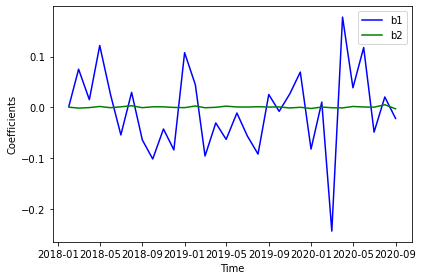

In [70]:
#select excess returns and take their mean along axis 0

plt.plot(stats2.index.to_timestamp(), stats2.b1, '-b', label='b1')
plt.plot(stats2.index.to_timestamp(), stats2.b2, '-g', label='b2')
plt.legend(loc='upper right')

plt.xlabel("Time")
plt.ylabel("Coefficients")

plt.tight_layout()

In [71]:
numpy.mean(alphas_mac)

0.010141681508864044

In [72]:
numpy.mean(numpy.array(b1_mac))

-0.006015930361552139

In [73]:
numpy.mean(b2_mac)

0.00039546969410248617

In [74]:
scipy.stats.ttest_1samp(alphas_mac, popmean = 0)

Ttest_1sampResult(statistic=0.886813123035431, pvalue=0.38200797793379093)

In [75]:
scipy.stats.ttest_1samp(b1_mac, popmean = 0)

Ttest_1sampResult(statistic=-0.4138248882805525, pvalue=0.6818515092013784)

In [76]:
scipy.stats.ttest_1samp(b2_mac, popmean = 0)

Ttest_1sampResult(statistic=1.4058669780835562, pvalue=0.1697080316370293)

In [77]:
formula = df_famamacbeth.columns[0] + " ~ " + df_famamacbeth.columns[32] + " + "+ df_famamacbeth.columns[33]
model = sm.ols(formula, data=df_famamacbeth).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     M1   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.112
Method:                 Least Squares   F-statistic:                   0.04479
Date:                Sun, 07 Feb 2021   Prob (F-statistic):              0.956
Time:                        23:13:17   Log-Likelihood:                 69.064
No. Observations:                  20   AIC:                            -132.1
Df Residuals:                      17   BIC:                            -129.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0415      0.019     -2.215      0.041      -0.081      -0.002
Beta           0.0022      0.013      0.171      0.866      -0.025       0.029
Size1          0.0003      0.001      0.265      0.794      -0.002       0.002
==============================================================================
Omnibus:                        0.118   Durbin-Watson:                   2.744
Prob(Omnibus):                  0.943   Jarque-Bera (JB):                0.235
Skew:                          -0.153   Prob(JB):                        0.889
Kurtosis:                       2.567   Cond. No.                         93.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3. Alphabet investing

In [78]:
td = pd.read_csv("ticker_info.csv")
td

,PERMNO,HTICK
0,14403,NaN
1,12160,NaN
2,63845,NaN
3,15580,AAME
4,28820,NaN
...,...,...
30113,19840,PRFX
30114,19843,SLN
30115,19846,SYTA
30116,19847,TSHA


In [79]:
td.dropna(inplace=True)
td

,PERMNO,HTICK
3,15580,AAME
5,14593,AAPL
27,59248,TAP
51,61487,AE
57,10779,BKTI
...,...,...
30113,19840,PRFX
30114,19843,SLN
30115,19846,SYTA
30116,19847,TSHA


In [80]:
AA = []
AB = []
BB = []
BA = []

AA_PERM = []
AB_PERM = []
BB_PERM = []
BA_PERM = []

for tckr in td["HTICK"]:
    if len(tckr) > 1:
        if tckr[:2] == "AA":
            AA.append(tckr)
            AA_PERM.append(td[td['HTICK']==tckr]['PERMNO'].values[0])
        if tckr[:2] == "AB":
            AB.append(tckr)
            AB_PERM.append(td[td['HTICK']==tckr]['PERMNO'].values[0])
        if tckr[:2] == "BB":
            BB.append(tckr)
            BB_PERM.append(td[td['HTICK']==tckr]['PERMNO'].values[0])
        if tckr[:2] == "BA":
            BA.append(tckr)
            BA_PERM.append(td[td['HTICK']==tckr]['PERMNO'].values[0])


In [81]:
print(AA)
print(AB)
print(BB)
print(BA)

['AAME', 'AAPL', 'AAN', 'AAON', 'AAL', 'AAXN', 'AAP', 'AAU', 'AACG', 'AADR', 'AAT', 'AAMC', 'AAOI', 'AA', 'AAAU', 'AACQ']
['ABCB', 'ABC', 'ABIO', 'ABT', 'ABMD', 'AB', 'ABM', 'ABEV', 'ABEO', 'ABB', 'ABG', 'ABR', 'ABUS', 'ABBV', 'ABTX', 'ABEQ']
['BBY', 'BBBY', 'BBI', 'BBSI', 'BBQ', 'BB', 'BBGI', 'BBVA', 'BBAR', 'BBF', 'BBDO', 'BBK', 'BBL', 'BBW', 'BBDC', 'BBN', 'BBU', 'BBCP', 'BBX', 'BBIO']
['BAC', 'BANF', 'BANR', 'BASI', 'BAX', 'BA', 'BAP', 'BAM', 'BANC', 'BAF', 'BATL', 'BAH', 'BANX', 'BABA', 'BAR', 'BAND']


In [82]:
print(AA_PERM)
print(AB_PERM)
print(BB_PERM)
print(BA_PERM)

[15580, 14593, 10517, 76868, 21020, 89031, 89217, 91038, 92520, 10113, 12513, 14127, 14145, 16347, 18035, 19808]
[80498, 81540, 85293, 20482, 75107, 75278, 47730, 85254, 87656, 88953, 89327, 90102, 12411, 13721, 15774, 19171]
[85914, 77659, 79022, 79249, 84203, 86745, 87589, 75381, 79895, 89051, 13286, 89361, 89760, 90371, 91834, 12039, 16071, 16895, 16837, 18770]
[59408, 79072, 82575, 85526, 27887, 19561, 82311, 85259, 89482, 89538, 91283, 12366, 14302, 14888, 16861, 17106]


In [83]:
df = pd.read_csv("stock_data.csv")  # load stock data

df = df[df.RET!="C"]

df.RET = df.RET.astype("float")

df.date = pd.to_datetime(df.date)

df = df.drop(["SHRCD", "EXCHCD", "CUSIP", "FACPR", "FACSHR", "PRC", "SHROUT"], axis=1) #exclude unnecessary columns

#df[df['PERMNO'].isin(AA_PERM)].groupby("date").mean()

In [84]:
df2 = df.copy(deep=True)
df3 = df.copy(deep=True)
df4 = df.copy(deep=True)

In [85]:
# returns of the portfolios

AA_Ret = df[df['PERMNO'].isin(AA_PERM)].groupby("date").mean().RET

AB_Ret = df2[df2['PERMNO'].isin(AB_PERM)].groupby("date").mean().RET

BB_Ret = df3[df3['PERMNO'].isin(BB_PERM)].groupby("date").mean().RET

BA_Ret = df4[df4['PERMNO'].isin(BA_PERM)].groupby("date").mean().RET

merged = pd.concat([AA_Ret, AB_Ret, BB_Ret, BA_Ret], axis=1)

merged.columns = ["AA", "AB", "BB", "BA" ]

merged


,AA,AB,BB,BA
date,,,,
2018-01-31,0.005677,0.111766,-0.002580,0.035542
2018-02-28,0.019921,-0.024617,-0.006310,-0.033942
2018-03-29,-0.001069,-0.017987,0.026231,-0.021288
2018-04-30,0.007753,0.027206,0.028206,0.039437
2018-05-31,0.099575,0.042285,-0.044514,0.027325
2018-06-29,-0.003864,-0.010125,-0.002525,-0.009217
2018-07-31,-0.000070,-0.019371,-0.037543,0.020856
2018-08-31,0.072376,0.056681,0.004917,0.055967
2018-09-28,-0.055238,-0.017408,-0.040434,0.004363


In [86]:
# long - short portfolios

merged["AAAB"] = merged["AA"] - merged["AB"]
merged["AABB"] = merged["AA"] - merged["BB"]
merged["AABA"] = merged["AA"] - merged["BA"]
merged["ABAA"] = merged["AB"] - merged["AA"]
merged["ABBB"] = merged["AB"] - merged["BB"]
merged["ABBA"] = merged["AB"] - merged["BA"]
merged["BBAA"] = merged["BB"] - merged["AA"]
merged["BBAB"] = merged["BB"] - merged["AB"]
merged["BBBA"] = merged["BB"] - merged["BA"]
merged["BAAA"] = merged["BA"] - merged["AA"]

In [87]:
merged

,AA,AB,BB,BA,AAAB,AABB,AABA,ABAA,ABBB,ABBA,BBAA,BBAB,BBBA,BAAA
date,,,,,,,,,,,,,,
2018-01-31,0.005677,0.111766,-0.002580,0.035542,-0.106089,0.008257,-0.029865,0.106089,0.114346,0.076224,-0.008257,-0.114346,-0.038122,0.029865
2018-02-28,0.019921,-0.024617,-0.006310,-0.033942,0.044538,0.026231,0.053863,-0.044538,-0.018306,0.009325,-0.026231,0.018306,0.027632,-0.053863
2018-03-29,-0.001069,-0.017987,0.026231,-0.021288,0.016918,-0.027299,0.020219,-0.016918,-0.044217,0.003301,0.027299,0.044217,0.047518,-0.020219
2018-04-30,0.007753,0.027206,0.028206,0.039437,-0.019453,-0.020453,-0.031684,0.019453,-0.001000,-0.012231,0.020453,0.001000,-0.011231,0.031684
2018-05-31,0.099575,0.042285,-0.044514,0.027325,0.057290,0.144089,0.072250,-0.057290,0.086799,0.014960,-0.144089,-0.086799,-0.071839,-0.072250
2018-06-29,-0.003864,-0.010125,-0.002525,-0.009217,0.006261,-0.001339,0.005353,-0.006261,-0.007600,-0.000908,0.001339,0.007600,0.006692,-0.005353
2018-07-31,-0.000070,-0.019371,-0.037543,0.020856,0.019301,0.037473,-0.020926,-0.019301,0.018172,-0.040228,-0.037473,-0.018172,-0.058399,0.020926
2018-08-31,0.072376,0.056681,0.004917,0.055967,0.015695,0.067459,0.016409,-0.015695,0.051764,0.000715,-0.067459,-0.051764,-0.051049,-0.016409
2018-09-28,-0.055238,-0.017408,-0.040434,0.004363,-0.037830,-0.014804,-0.059601,0.037830,0.023026,-0.021772,0.014804,-0.023026,-0.044797,0.059601


In [88]:
# drop initial long only portfolios from dataframe

merged = merged.drop(["AA", "AB", "BB", "BA"], axis = 1)
merged

,AAAB,AABB,AABA,ABAA,ABBB,ABBA,BBAA,BBAB,BBBA,BAAA
date,,,,,,,,,,
2018-01-31,-0.106089,0.008257,-0.029865,0.106089,0.114346,0.076224,-0.008257,-0.114346,-0.038122,0.029865
2018-02-28,0.044538,0.026231,0.053863,-0.044538,-0.018306,0.009325,-0.026231,0.018306,0.027632,-0.053863
2018-03-29,0.016918,-0.027299,0.020219,-0.016918,-0.044217,0.003301,0.027299,0.044217,0.047518,-0.020219
2018-04-30,-0.019453,-0.020453,-0.031684,0.019453,-0.001000,-0.012231,0.020453,0.001000,-0.011231,0.031684
2018-05-31,0.057290,0.144089,0.072250,-0.057290,0.086799,0.014960,-0.144089,-0.086799,-0.071839,-0.072250
2018-06-29,0.006261,-0.001339,0.005353,-0.006261,-0.007600,-0.000908,0.001339,0.007600,0.006692,-0.005353
2018-07-31,0.019301,0.037473,-0.020926,-0.019301,0.018172,-0.040228,-0.037473,-0.018172,-0.058399,0.020926
2018-08-31,0.015695,0.067459,0.016409,-0.015695,0.051764,0.000715,-0.067459,-0.051764,-0.051049,-0.016409
2018-09-28,-0.037830,-0.014804,-0.059601,0.037830,0.023026,-0.021772,0.014804,-0.023026,-0.044797,0.059601


In [89]:
#load MOM factor data

MOM = reader.DataReader("F-F_Momentum_Factor", "famafrench", start, end)

MOM = MOM[0]

MOM

,Mom
Date,
2018-01,3.94
2018-02,3.97
2018-03,-1.28
2018-04,0.27
2018-05,3.80
2018-06,-2.38
2018-07,-1.67
2018-08,5.22
2018-09,-0.06


In [90]:
#load Fama French 5 factor data

FF_5 = reader.DataReader("F-F_Research_Data_5_Factors_2x3", "famafrench", start, end)

FF_5 = FF_5[0]

FF_5

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2018-01,5.58,-3.19,-1.32,-0.82,-0.86,0.11
2018-02,-3.65,0.37,-1.01,0.58,-2.23,0.11
2018-03,-2.35,3.60,-0.12,-0.45,0.00,0.12
2018-04,0.29,0.96,0.50,-2.33,1.18,0.14
2018-05,2.65,4.74,-3.15,-2.01,-1.44,0.14
2018-06,0.48,0.89,-2.31,0.83,0.34,0.14
2018-07,3.19,-1.95,0.57,1.53,0.40,0.16
2018-08,3.44,0.64,-3.92,-0.15,-2.47,0.16
2018-09,0.06,-2.49,-1.63,0.59,1.26,0.15


In [91]:
merged.index = FF_5.index

In [92]:
port_matrix = pd.concat([merged, FF_5, MOM], axis=1) #merge all data

In [93]:
port_matrix

,AAAB,AABB,AABA,ABAA,ABBB,ABBA,BBAA,BBAB,BBBA,BAAA,Mkt-RF,SMB,HML,RMW,CMA,RF,Mom
Date,,,,,,,,,,,,,,,,,
2018-01,-0.106089,0.008257,-0.029865,0.106089,0.114346,0.076224,-0.008257,-0.114346,-0.038122,0.029865,5.58,-3.19,-1.32,-0.82,-0.86,0.11,3.94
2018-02,0.044538,0.026231,0.053863,-0.044538,-0.018306,0.009325,-0.026231,0.018306,0.027632,-0.053863,-3.65,0.37,-1.01,0.58,-2.23,0.11,3.97
2018-03,0.016918,-0.027299,0.020219,-0.016918,-0.044217,0.003301,0.027299,0.044217,0.047518,-0.020219,-2.35,3.60,-0.12,-0.45,0.00,0.12,-1.28
2018-04,-0.019453,-0.020453,-0.031684,0.019453,-0.001000,-0.012231,0.020453,0.001000,-0.011231,0.031684,0.29,0.96,0.50,-2.33,1.18,0.14,0.27
2018-05,0.057290,0.144089,0.072250,-0.057290,0.086799,0.014960,-0.144089,-0.086799,-0.071839,-0.072250,2.65,4.74,-3.15,-2.01,-1.44,0.14,3.80
2018-06,0.006261,-0.001339,0.005353,-0.006261,-0.007600,-0.000908,0.001339,0.007600,0.006692,-0.005353,0.48,0.89,-2.31,0.83,0.34,0.14,-2.38
2018-07,0.019301,0.037473,-0.020926,-0.019301,0.018172,-0.040228,-0.037473,-0.018172,-0.058399,0.020926,3.19,-1.95,0.57,1.53,0.40,0.16,-1.67
2018-08,0.015695,0.067459,0.016409,-0.015695,0.051764,0.000715,-0.067459,-0.051764,-0.051049,-0.016409,3.44,0.64,-3.92,-0.15,-2.47,0.16,5.22
2018-09,-0.037830,-0.014804,-0.059601,0.037830,0.023026,-0.021772,0.014804,-0.023026,-0.044797,0.059601,0.06,-2.49,-1.63,0.59,1.26,0.15,-0.06


In [94]:
# convert the returns to percentage to match fama french data

cols = port_matrix.columns[:10]

for col in cols:
    port_matrix[col] = port_matrix[col]*100
    port_matrix[col] = port_matrix[col] - port_matrix["RF"]
        

In [95]:
port_matrix

,AAAB,AABB,AABA,ABAA,ABBB,ABBA,BBAA,BBAB,BBBA,BAAA,Mkt-RF,SMB,HML,RMW,CMA,RF,Mom
Date,,,,,,,,,,,,,,,,,
2018-01,-10.718928,0.715662,-3.096497,10.498928,11.324590,7.512430,-0.935662,-11.544590,-3.922160,2.876497,5.58,-3.19,-1.32,-0.82,-0.86,0.11,3.94
2018-02,4.343767,2.513122,5.276311,-4.563767,-1.940644,0.822544,-2.733122,1.720644,2.653189,-5.496311,-3.65,0.37,-1.01,0.58,-2.23,0.11,3.97
2018-03,1.571789,-2.849944,1.901881,-1.811789,-4.541733,0.210092,2.609944,4.301733,4.631826,-2.141881,-2.35,3.60,-0.12,-0.45,0.00,0.12,-1.28
2018-04,-2.085310,-2.185273,-3.308420,1.805310,-0.239963,-1.363110,1.905273,-0.040037,-1.263147,3.028420,0.29,0.96,0.50,-2.33,1.18,0.14,0.27
2018-05,5.588956,14.268887,7.084960,-5.868956,8.539932,1.356004,-14.548888,-8.819932,-7.323927,-7.364960,2.65,4.74,-3.15,-2.01,-1.44,0.14,3.80
2018-06,0.486102,-0.273876,0.395280,-0.766102,-0.899978,-0.230822,-0.006124,0.619978,0.529156,-0.675280,0.48,0.89,-2.31,0.83,0.34,0.14,-2.38
2018-07,1.770143,3.587321,-2.252620,-2.090143,1.657178,-4.182763,-3.907321,-1.977178,-5.999941,1.932620,3.19,-1.95,0.57,1.53,0.40,0.16,-1.67
2018-08,1.409456,6.585867,1.480920,-1.729456,5.016411,-0.088536,-6.905867,-5.336411,-5.264947,-1.800920,3.44,0.64,-3.92,-0.15,-2.47,0.16,5.22
2018-09,-3.932979,-1.630390,-6.110130,3.632979,2.152589,-2.327151,1.330390,-2.452589,-4.629740,5.810130,0.06,-2.49,-1.63,0.59,1.26,0.15,-0.06


In [96]:
df = port_matrix.rename(columns={'Mkt-RF': 'MktRF'})

df = df.rename(columns = {df.columns[-1]: 'MOM'})

In [97]:
#running time-series regressions with 5 factor plus momentum model to estimate alphas and t stats

alphas_5 = []
t_alpha_5 = []
pval_5 = []

for col in cols:
    formula = col + " ~ MktRF + SMB + HML + RMW + CMA + MOM"
    model = sm.ols(formula, data=df).fit()
    alphas_5.append(model.params[0])
    t_alpha_5.append(model.tvalues[0])
    pval_5.append(model.pvalues[0])
 

In [98]:
#running time-series regressions with CAPM model to estimate alphas and t stats

alphas_capm = []
t_alpha_capm = []
pval_capm = []

for col in cols:
    formula = col + " ~ MktRF"
    model = sm.ols(formula, data=df).fit()
    alphas_capm.append(model.params[0])
    t_alpha_capm.append(model.tvalues[0])
    pval_capm.append(model.pvalues[0])
    

In [99]:
stats3 = { "CAPM 𝛼": alphas_capm,"CAPM t-stats for 𝛼" : t_alpha_capm, "5 Factor + Mom 𝛼" : alphas_5, "5 Factor + Mom t-stats for 𝛼": t_alpha_5}

stats3 = pd.DataFrame(stats3, index = cols)

stats3

,CAPM 𝛼,CAPM t-stats for 𝛼,5 Factor + Mom 𝛼,5 Factor + Mom t-stats for 𝛼
AAAB,-0.087160,-0.065770,0.625895,0.375730
AABB,1.364338,1.444633,0.837634,0.736269
AABA,-0.472595,-0.593212,-0.180081,-0.189170
ABAA,-0.181204,-0.136880,-0.920322,-0.552938
ABBB,1.317316,0.770951,0.064526,0.030304
ABBA,-0.519617,-0.425820,-0.953189,-0.606566
BBAA,-1.632701,-1.729901,-1.132062,-0.992213
BBAB,-1.585679,-0.927597,-0.358953,-0.168352
BBBA,-1.971114,-1.924420,-1.164929,-1.012954
BAAA,0.204231,0.259227,-0.114346,-0.121442


In [100]:
stats3.to_excel('stats3.xlsx')

In [101]:
#check if alphas are significant at 0.1

print(numpy.array(pval_5) < 0.1)
print(numpy.array(pval_capm) < 0.1)

[False False False False False False False False False False]
[False False False False False False  True False  True False]


In [102]:
#check if alphas are significant at 0.05

print(numpy.array(pval_5) < 0.05)
print(numpy.array(pval_capm) < 0.05)

[False False False False False False False False False False]
[False False False False False False False False False False]


In [103]:
#check if alphas are significant at 0.01

print(numpy.array(pval_5) < 0.01)
print(numpy.array(pval_capm) < 0.01)

[False False False False False False False False False False]
[False False False False False False False False False False]
